<a href="https://colab.research.google.com/github/yasmine2245/Data-Science/blob/main/BDC_Interview_Project_(Random_Forest_%2BLR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BDC Interview Project: Loan Default Prediction + Dashboard**

I'm setting up the dataset at first. We are importing the dataset from kaggle. The dataset is called "Loan Status Prediction" and the author goes by the user "bhavikjikadara".

My purpose in this project is to predict whether a loan will be approved or not. The dataset has 13 columns which are the following:

**Loan_ID:** A unique loan ID.

**Gender:** Either male or female.

**Married:** Weather Married(yes) or Not Marttied(No).

**Dependents:** Number of persons depending on the client.

**Education:** Applicant Education(Graduate or Undergraduate).

**Self_Employed:** Self-employed (Yes/No).

**ApplicantIncome:** Applicant income.

**CoapplicantIncome:** Co-applicant income.

**LoanAmount:** Loan amount in thousands.

**Loan_Amount_Term:** Terms of the loan in months.

**Credit_History:** Credit history meets guidelines.

**Property_Area:** Applicants are living either Urban, Semi-Urban or Rural.

**Loan_Status:** Loan approved (Y/N)


In [1]:
import kagglehub
import os
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/loan-status-prediction")
Loan_Dataset=pd.read_csv(os.path.join(path,"loan_data.csv"))

#Understanding the dataset first
print(Loan_Dataset.head())

print(Loan_Dataset.describe())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001013   Male     Yes          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

### **Data Cleaning + EDA**

To accurately predict our loan approvals, we need to make sure our data is clean, doesn't have any missing values has the proper formatting for categorical variables. This will save us a lot of trouble and avoid any issues later down in our analysis and prediction model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#checking missing values in the dataset
print(Loan_Dataset.isnull().sum())

#checking duplicates
print(Loan_Dataset.duplicated().sum())

#checking if loan_status has any class imbalances (if value other than 0 or 1)
print(Loan_Dataset['Loan_Status'].value_counts())

#making sure there are no typos in Gender
print(Loan_Dataset['Gender'].value_counts())

#making sure there are no typos in Married
print(Loan_Dataset['Married'].value_counts())

#making sure there are no typos in Dependents
print(Loan_Dataset['Dependents'].value_counts())

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64
0
Loan_Status
Y    271
N    110
Name: count, dtype: int64
Gender
Male      291
Female     85
Name: count, dtype: int64
Married
Yes    228
No     153
Name: count, dtype: int64
Dependents
0     234
2      59
1      52
3+     28
Name: count, dtype: int64


We don't have any duplicates, class imbalances or typos which is good. However, we have some missing values in the columns Gender, Dependents, Self_Employed, Loan_Amount_Term and Credit_History.

Since missing Gender, Self_Employed and Dependents values represented about 5-6% of the dataset and appear to be missing at random, I will impute the missing values with the mode.

For the Loan_Amount_Term missing values I will instead impute it with the median as the amounts can be skewed. And for the Credit_History missing values I will impute it using the mode as the values are discrete (0 or 1) and not continuous.

In [3]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']
for col in categorical_cols:
    Loan_Dataset[col].fillna(Loan_Dataset[col].mode()[0], inplace=True)

Loan_Dataset['Loan_Amount_Term'].fillna(Loan_Dataset['Loan_Amount_Term'].median(), inplace=True)

#Check that we filled all missing data
print(Loan_Dataset.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-3-89aceef69f34>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Loan_Dataset[col].fillna(Loan_Dataset[col].mode()[0], inplace=True)
<ipython-input-3-89aceef69f34>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

Next I want to encode the categorical variables so that my future machine model can understand them.

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

categorical_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']
for col in categorical_cols:
    Loan_Dataset[col] = label_encoder.fit_transform(Loan_Dataset[col])

print(Loan_Dataset.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001003       1        1           1          0              0   
1  LP001005       1        1           0          0              1   
2  LP001006       1        1           0          1              0   
3  LP001008       1        0           0          0              0   
4  LP001013       1        1           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             2333             1516.0        95.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              0            0  
1             1.0              2            1  
2       

### **Feature Selection and Splitting Training and Test set**

Before feature selection and training/test splitting, I will first check the correlation to understand which features are most important, find strong relationships and also have a look into some business insights that might not be expected.

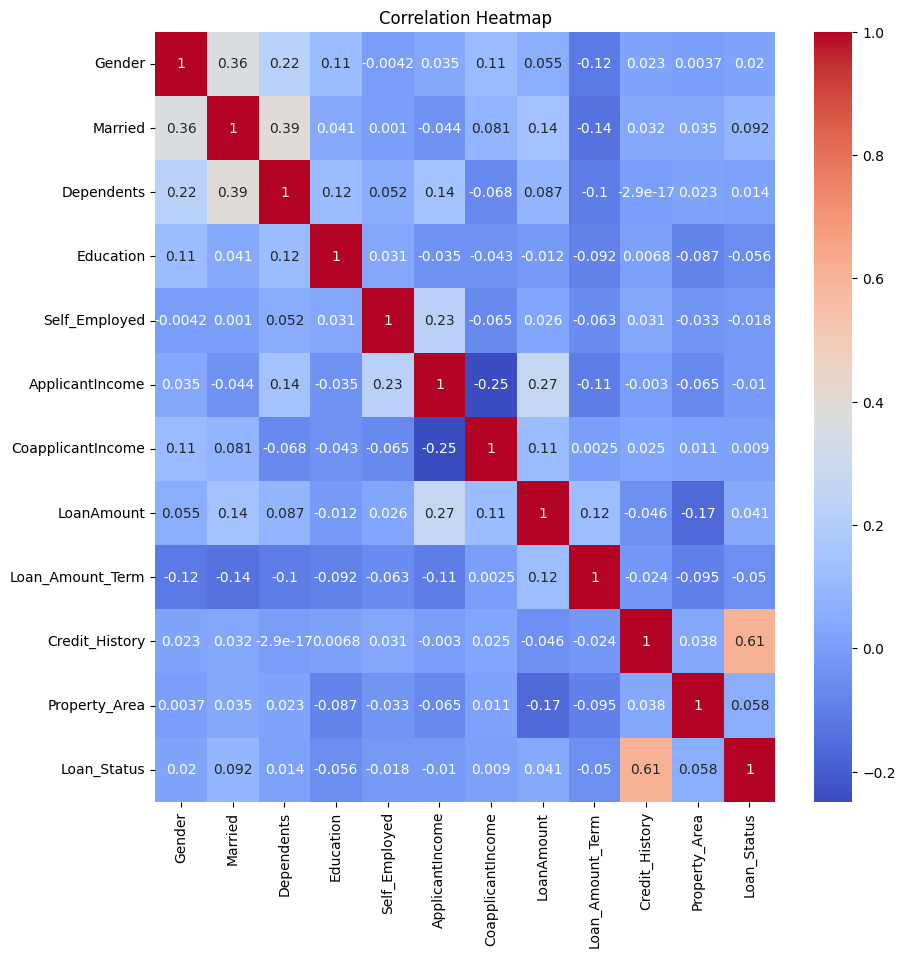

In [5]:
plt.figure(figsize=(10,10))
#dropped loan_id because it is not numerical and not needed here
sns.heatmap(Loan_Dataset.drop(columns=['Loan_ID']).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As expected, Credit_History and Loan_Status have a strong correlation. We can also see a weak correlation between LoanAmount and ApplicantIncome. We don't see correlations lower tha -0.9 or higher than 0.9 so we don't need to drop anything.

In [6]:
from sklearn.model_selection import train_test_split

X = Loan_Dataset.drop(columns=['Loan_ID','Loan_Status']) #dropped loan_id as it is not useful
y = Loan_Dataset['Loan_Status']

#choosing a 80/20 split with startification (ensures that the random split
#doesn't add too many approvals or rejections making model unbalanced. Balance
# is especially important here because it is a loan prediction model)

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#checking the splits to make sure everything is good
#print(X_train.shape, X_test.shape)
#print(y_train.value_counts(normalize=True))
#print(y_test.value_counts(normalize=True))


### **Building the Model**

In this step, I will be building two ML models: Logistic Regression and Random Forest.

The reason for this is that I want to start simple with logistic regression and then move on to random forest as it is more powerful, shows feature importance well and is not very sensitive to outliers.

I didn't use other models for the following reasons:


*   **SVM** = It would be slow on this data as it is pretty big and would also require a lot of tuning (which would take more time explaining in the interview)
*   **XGBoost** = While it might perform better, it is more complicated and would be too time consuming to demonstrate/explain during the interview.
*   **Neural Networks** = Would be overkill for this dataset and need a much longer training time.
*   **k-NN** = Doesn't generalize or scale well on data of this size.

Note: In a real work project I would explore XGBoost after deploying Random Forest if I needed higher performance, but it is important to start simple first.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Logistic Regression
logistic_model = LogisticRegression( random_state=42)
logistic_model.fit(X_train, y_train)

y_log_pred=logistic_model.predict(X_test)
#predicting probabilities
y_log_prob=logistic_model.predict_proba(X_test)[:,1]

#Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_rf_pred=random_forest_model.predict(X_test)
y_rf_prob=random_forest_model.predict_proba(X_test)[:,1]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Evaluating The Models**

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(y_true, y_pred, y_prob,model_name):
    print(f"=== {model_name} Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.4f}")
    print()

evaluate_model(y_test, y_log_pred, y_log_prob,'Logistic Regression')
evaluate_model(y_test, y_rf_pred, y_rf_prob,'Random Forest')


=== Logistic Regression Evaluation ===
Accuracy: 0.8442
Precision: 0.8308
Recall: 0.9818
F1 Score: 0.9000
ROC-AUC: 0.7752

=== Random Forest Evaluation ===
Accuracy: 0.8701
Precision: 0.8571
Recall: 0.9818
F1 Score: 0.9153
ROC-AUC: 0.8649



As expected the Random Forest model performs slightly better with better Accuracy, better Precision (so less false positives), better F1-Score (stronger balance between Precision and Recall) and much better ROC-AUC which shows it ability to seperate approved vs rejected loans.

So, Random Forest is the model I will choose.

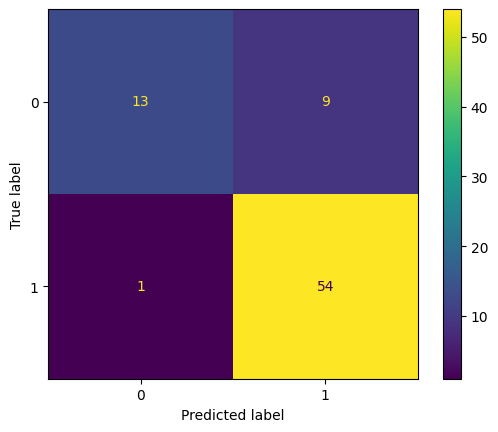

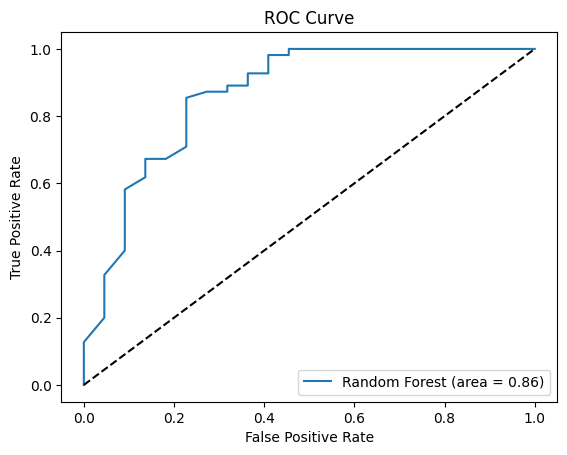

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve

#visulaizing our results
conf_mat = confusion_matrix(y_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=random_forest_model.classes_)
disp.plot()
plt.show()

#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_rf_prob)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc_score(y_test, y_rf_prob))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()